In [17]:
import os
import json
import csv
import numpy as np
import pandas as pd

JSON_PATH = "/Users/morenx/Downloads/mt/arxiv-metadata-oai-snapshot-2020-08-14.json"

In [ ]:
#cargar archivo json
print("Loading JSON file...")
try:
    with open(JSON_PATH, "r") as f:
        data = [json.loads(line) for line in f]
    print(f"Loaded {len(data)} papers from json file")
except Exception as e:
    print(f"Error loading JSON file: {e}")
    raise

Loading JSON file...
Loaded1747307 papers from json file


In [15]:
data

[{'id': '0704.0001',
  'submitter': 'Pavel Nadolsky',
  'authors': "C. Bal\\'azs, E. L. Berger, P. M. Nadolsky, C.-P. Yuan",
  'title': 'Calculation of prompt diphoton production cross sections at Tevatron and\n  LHC energies',
  'comments': '37 pages, 15 figures; published version',
  'journal-ref': 'Phys.Rev.D76:013009,2007',
  'doi': '10.1103/PhysRevD.76.013009',
  'report-no': 'ANL-HEP-PR-07-12',
  'categories': 'hep-ph',
  'license': None,
  'abstract': '  A fully differential calculation in perturbative quantum chromodynamics is\npresented for the production of massive photon pairs at hadron colliders. All\nnext-to-leading order perturbative contributions from quark-antiquark,\ngluon-(anti)quark, and gluon-gluon subprocesses are included, as well as\nall-orders resummation of initial-state gluon radiation valid at\nnext-to-next-to-leading logarithmic accuracy. The region of phase space is\nspecified in which the calculation is most reliable. Good agreement is\ndemonstrated with d

en este primer bloque de codigo cargue todo, pero queda a tu criterio a decidir cuantos de esos papers usaremos

In [3]:
#checamos la cantidad de categorias que tenemos
categories = set()

for entry in data:
    if entry["categories"] is not None:
        #split each categorie and add each to the set
        for cat in entry["categories"].split():
            categories.add(cat)

total_unique_categories = len(categories)
print(total_unique_categories)

176


In [4]:
#papers relacionados a las matematicas
math_categories = set()

for entry in data:
    if entry["categories"] is not None:
        for cat in entry["categories"].split():
            if cat.startswith("math."):
                math_categories.add(cat)
print(f"total unique math categories: {len(math_categories)}")
print(math_categories)


total unique math categories: 32
{'math.DG', 'math.KT', 'math.SP', 'math.PR', 'math.GM', 'math.ST', 'math.IT', 'math.OC', 'math.CA', 'math.MG', 'math.GR', 'math.NA', 'math.CO', 'math.MP', 'math.CT', 'math.DS', 'math.NT', 'math.OA', 'math.HO', 'math.RA', 'math.GT', 'math.QA', 'math.RT', 'math.FA', 'math.GN', 'math.LO', 'math.AG', 'math.AT', 'math.AP', 'math.SG', 'math.AC', 'math.CV'}


In [5]:
maths_absracts=[]
maths_data = {}
for i in data:
    if i ["categories"] in math_categories:
        maths_absracts.append({
    'abstract': i['abstract'],
    'categories': i['categories']
})

print(len(maths_absracts))

212243


In [7]:
#samnple
maths_absracts[:5]

[{'abstract': '  We show that a determinant of Stirling cycle numbers counts unlabeled acyclic\nsingle-source automata. The proof involves a bijection from these automata to\ncertain marked lattice paths and a sign-reversing involution to evaluate the\ndeterminant.\n',
  'categories': 'math.CO'},
 {'abstract': "  Partial cubes are isometric subgraphs of hypercubes. Structures on a graph\ndefined by means of semicubes, and Djokovi\\'{c}'s and Winkler's relations play\nan important role in the theory of partial cubes. These structures are employed\nin the paper to characterize bipartite graphs and partial cubes of arbitrary\ndimension. New characterizations are established and new proofs of some known\nresults are given.\n  The operations of Cartesian product and pasting, and expansion and\ncontraction processes are utilized in the paper to construct new partial cubes\nfrom old ones. In particular, the isometric and lattice dimensions of finite\npartial cubes obtained by means of these o

### saque de chatgpt el nombre completo de todas las subcategorias de matematicas

| Code        | Full Name                   |
| ----------- | --------------------------- |
| **math.MP** | Mathematical Physics        |
| **math.AP** | Analysis of PDEs            |
| **math.ST** | Statistics Theory           |
| **math.SG** | Symplectic Geometry         |
| **math.CA** | Classical Analysis and ODEs |
| **math.AT** | Algebraic Topology          |
| **math.QA** | Quantum Algebra             |
| **math.RA** | Rings and Algebras          |
| **math.NT** | Number Theory               |
| **math.GM** | General Mathematics         |
| **math.GN** | General Topology            |
| **math.OA** | Operator Algebras           |
| **math.AC** | Commutative Algebra         |
| **math.SP** | Spectral Theory             |
| **math.RT** | Representation Theory       |
| **math.OC** | Optimization and Control    |
| **math.CO** | Combinatorics               |
| **math.IT** | Information Theory          |
| **math.GT** | Geometric Topology          |
| **math.AG** | Algebraic Geometry          |
| **math.DG** | Differential Geometry       |
| **math.MG** | Metric Geometry             |
| **math.CT** | Category Theory             |
| **math.LO** | Logic                       |
| **math.CV** | Complex Variables           |
| **math.DS** | Dynamical Systems           |
| **math.KT** | K-Theory and Homology       |
| **math.GR** | Group Theory                |
| **math.FA** | Functional Analysis         |
| **math.NA** | Numerical Analysis          |
| **math.HO** | History and Overview        |
| **math.PR** | Probability                 |
'''

In [11]:
from collections import Counter

#contador de ocurrencias de cada subcategoria de matematicas
category_counts = Counter([entry['categories'] for entry in maths_absracts])

# Display counts
for category, count in category_counts.items():
    print(f"{category}: {count}")

math.CO: 20820
math.NT: 16016
math.NA: 9388
math.RA: 4914
math.FA: 9688
math.DS: 9875
math.AG: 15963
math.OA: 2941
math.PR: 18629
math.DG: 12802
math.GR: 6138
math.SG: 1403
math.GT: 6774
math.CV: 4910
math.AP: 23484
math.RT: 5544
math.MG: 2126
math.QA: 2672
math.AT: 3267
math.OC: 10482
math.GM: 2440
math.CA: 7668
math.SP: 1368
math.LO: 5007
math.KT: 599
math.AC: 3479
math.HO: 1217
math.CT: 1157
math.GN: 1472


guardare un df de momento para tener de base

In [18]:
keys = ["submitter", 
        "title", 
        "categories", 
        "abstract"]
with open("arxiv.csv", "w", newline="", encoding="utf-8") as f:
    writer = csv.DictWriter(f, fieldnames=keys)
    writer.writeheader()

    for item in data:
        # Extraer solo las claves deseadas 
        filtered = {k: item.get(k, "") for k in keys}
        writer.writerow(filtered)

In [20]:
df = pd.read_csv("/Users/morenx/Downloads/mt/arxiv.csv")
df

,submitter,title,categories,abstract
0,Pavel Nadolsky,Calculation of prompt diphoton production cros...,hep-ph,A fully differential calculation in perturba...
1,Louis Theran,Sparsity-certifying Graph Decompositions,math.CO cs.CG,"We describe a new algorithm, the $(k,\ell)$-..."
2,Hongjun Pan,The evolution of the Earth-Moon system based o...,physics.gen-ph,The evolution of Earth-Moon system is descri...
3,David Callan,A determinant of Stirling cycle numbers counts...,math.CO,We show that a determinant of Stirling cycle...
4,Alberto Torchinsky,From dyadic $\Lambda_{\alpha}$ to $\Lambda_{\a...,math.CA math.FA,In this paper we show how to compute the $\L...
...,...,...,...,...
1747302,Ruslan Prozorov,On the origin of the irreversibility line in t...,supr-con cond-mat.supr-con,We report on measurements of the angular dep...
1747303,Durga P. Choudhury,Nonlinear Response of HTSC Thin Film Microwave...,supr-con cond-mat.supr-con,The non-linear microwave surface impedance o...
1747304,Durga P. Choudhury,Critical State Flux Penetration and Linear Mic...,supr-con cond-mat.supr-con,The vortex contribution to the dc field (H) ...
1747305,Hasegawa Yasumasa,Density of States and NMR Relaxation Rate in A...,supr-con cond-mat.supr-con,We show that the density of states in an ani...


Teniendo en cuenta puntos pensados antes, propongo el definir mejor el enfoque del proyecto.
"¿puedo predecir la categoriea de papers usando solo titulo + abstract?"

In [22]:
#norm
df["first_cat"] = df["categories"].apply(lambda x: str(x).split()[0])
df["main_cat"] = df["first_cat"].apply(lambda x: x.split('.')[0])         # cs, math, physics...
df["sub_cat"] = df["first_cat"]                                          # cs.LG, math.OC, etc.

# new columns
df = df[["submitter",
        "title", 
        "abstract", "categories", 
        "main_cat", "sub_cat"]]

In [23]:
df

,submitter,title,abstract,categories,main_cat,sub_cat
0,Pavel Nadolsky,Calculation of prompt diphoton production cros...,A fully differential calculation in perturba...,hep-ph,hep-ph,hep-ph
1,Louis Theran,Sparsity-certifying Graph Decompositions,"We describe a new algorithm, the $(k,\ell)$-...",math.CO cs.CG,math,math.CO
2,Hongjun Pan,The evolution of the Earth-Moon system based o...,The evolution of Earth-Moon system is descri...,physics.gen-ph,physics,physics.gen-ph
3,David Callan,A determinant of Stirling cycle numbers counts...,We show that a determinant of Stirling cycle...,math.CO,math,math.CO
4,Alberto Torchinsky,From dyadic $\Lambda_{\alpha}$ to $\Lambda_{\a...,In this paper we show how to compute the $\L...,math.CA math.FA,math,math.CA
...,...,...,...,...,...,...
1747302,Ruslan Prozorov,On the origin of the irreversibility line in t...,We report on measurements of the angular dep...,supr-con cond-mat.supr-con,supr-con,supr-con
1747303,Durga P. Choudhury,Nonlinear Response of HTSC Thin Film Microwave...,The non-linear microwave surface impedance o...,supr-con cond-mat.supr-con,supr-con,supr-con
1747304,Durga P. Choudhury,Critical State Flux Penetration and Linear Mic...,The vortex contribution to the dc field (H) ...,supr-con cond-mat.supr-con,supr-con,supr-con
1747305,Hasegawa Yasumasa,Density of States and NMR Relaxation Rate in A...,We show that the density of states in an ani...,supr-con cond-mat.supr-con,supr-con,supr-con


EDA GENERAL DEL DATASET

In [25]:
print("Shape: ", df.shape)
print("\nValores nulos por columna:\n", df.isnull().sum())

Shape:  (1747307, 6)

Valores nulos por columna:
 submitter     15192
title             0
abstract          0
categories        0
main_cat          0
sub_cat           0
dtype: int64


<Axes: title={'center': 'Distribución de categorías principales'}, xlabel='main_cat'>

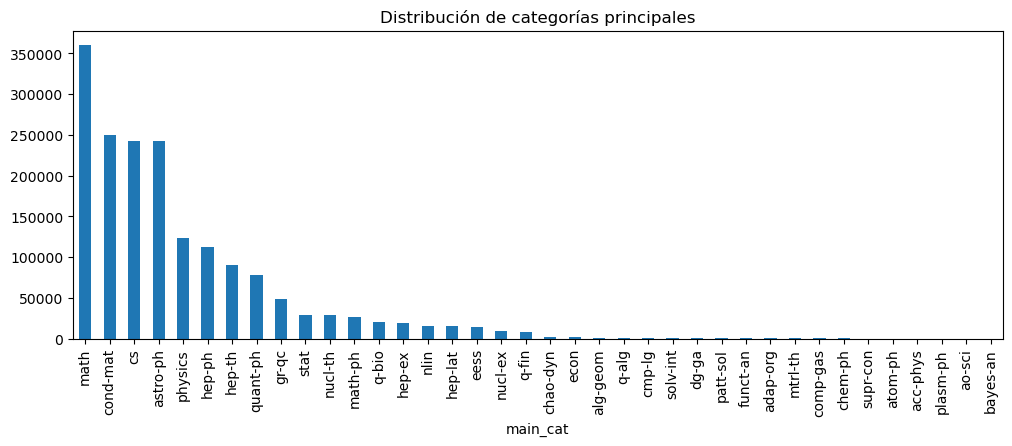

In [38]:
#main_cat counter
df["main_cat"].value_counts().plot(kind="bar", figsize=(12,4), title="Distribución de categorías principales")

In [39]:
##identificaremos las cat con pocos datos, para quitar
few = df["sub_cat"].value_counts().sort_values().head(20)
few

sub_cat
bayes-an     11
ao-sci       13
plasm-ph     28
acc-phys     46
atom-ph      68
supr-con     69
cs.GL        86
chem-ph     129
comp-gas    140
mtrl-th     165
adap-org    306
funct-an    320
cs.OS       341
econ.TH     351
q-fin.EC    385
nlin.CG     425
stat.OT     440
patt-sol    452
dg-ga       562
q-bio.OT    562
Name: count, dtype: int64

<Axes: title={'center': 'Top 30 subcategorías más frecuentes'}, xlabel='sub_cat'>

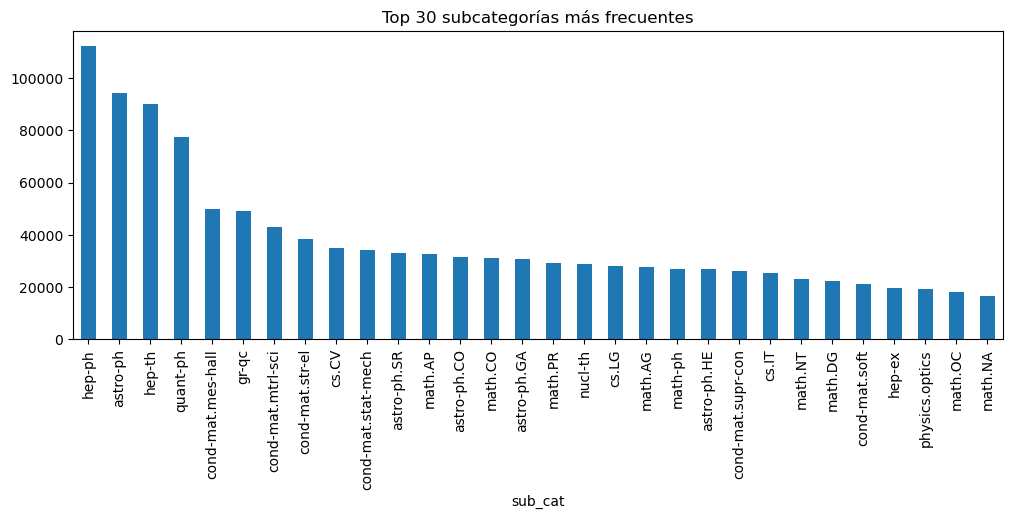

In [27]:
df["sub_cat"].value_counts().head(30).plot(kind="bar", figsize=(12,4), title="Top 30 subcategorías más frecuentes")

In [29]:
print("Main categories :", df["main_cat"].nunique())
print("Sub categories :", df["sub_cat"].nunique())

Main categories : 38
Sub categories : 172


EDA DE TEXTO (TITLE + ABSTRACT)

In [ ]:
## LONGITUD DE TEXTO Y TITULO
df["title_length"] = df["title"].apply(lambda x: len(str(x).split()))
df["abstract_length"] = df["abstract"].apply(lambda x: len(str(x).split()))

In [33]:
df[["title_length", "abstract_length"]].describe()

,title_length,abstract_length
count,1.747307e+06,1.747307e+06
mean,9.634111e+00,1.325679e+02
std,3.731258e+00,6.383316e+01
min,1.000000e+00,1.000000e+00
25%,7.000000e+00,8.400000e+01
50%,9.000000e+00,1.240000e+02
75%,1.200000e+01,1.740000e+02
max,6.100000e+01,9.250000e+02


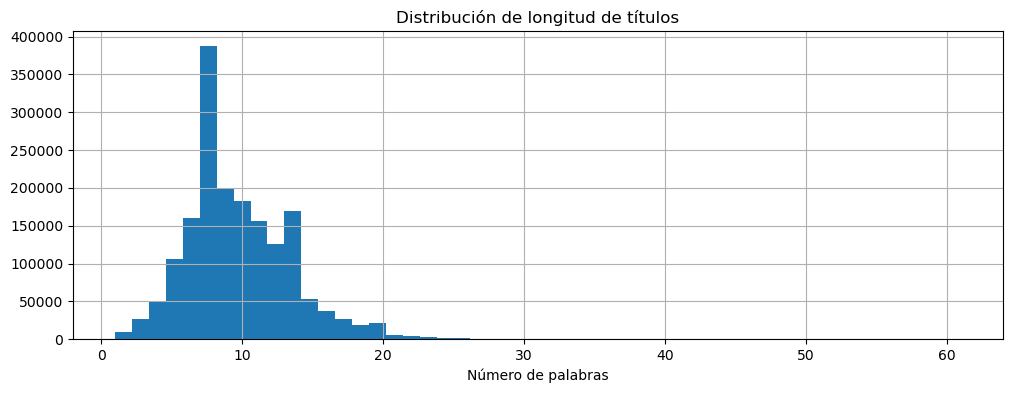

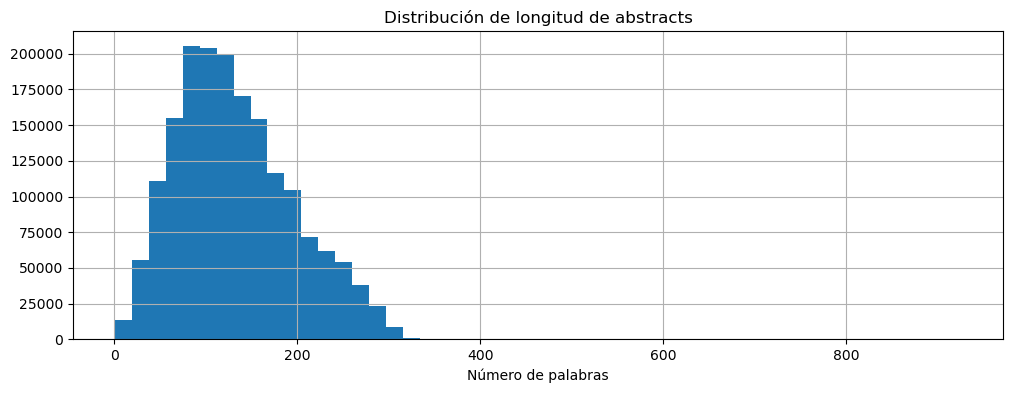

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
df["title_length"].hist(bins=50)
plt.title("Distribución de longitud de títulos")
plt.xlabel("Número de palabras")
plt.show()

plt.figure(figsize=(12,4))
df["abstract_length"].hist(bins=50)
plt.title("Distribución de longitud de abstracts")
plt.xlabel("Número de palabras")
plt.show()

Text(0.5, 1.0, 'Longitud promedio del abstract por categoría principal')

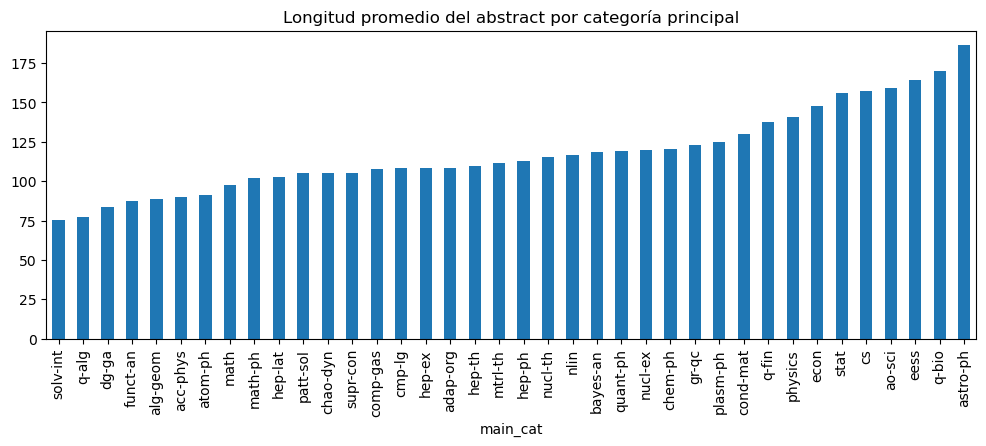

In [35]:
df.groupby("main_cat")["abstract_length"].mean().sort_values().plot(kind="bar", figsize=(12,4))
plt.title("Longitud promedio del abstract por categoría principal")

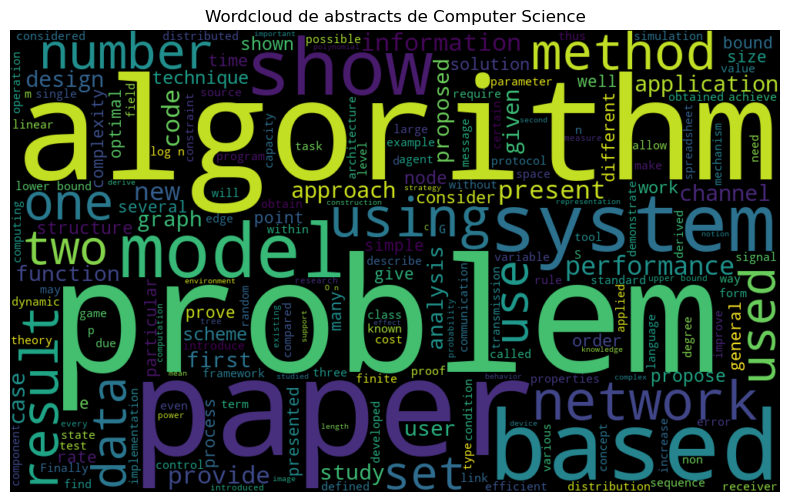

In [36]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = " ".join(df[df["main_cat"] == "cs"]["abstract"].tolist()[:5000])  # solo primeros 5k abstracts
wc = WordCloud(width=1000, height=600).generate(text)

plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("Wordcloud de abstracts de Computer Science")
plt.show()

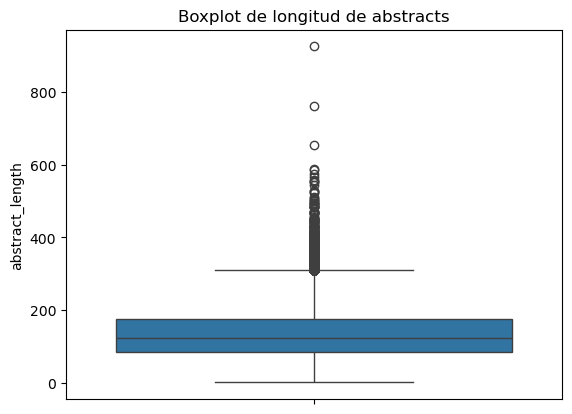

In [ ]:
import seaborn as sns
#OUTLIER DETECTION
sns.boxplot(df["abstract_length"])
plt.title("Boxplot de longitud de abstracts")
plt.show()